In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\breje\\OneDrive\\Desktop\\ML Dataset\\Deep Learning - Jose Portilla\\TF_2_Notebooks_and_Data\\DATA')

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.shape

(396030, 27)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# MISSING DATA

In [7]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

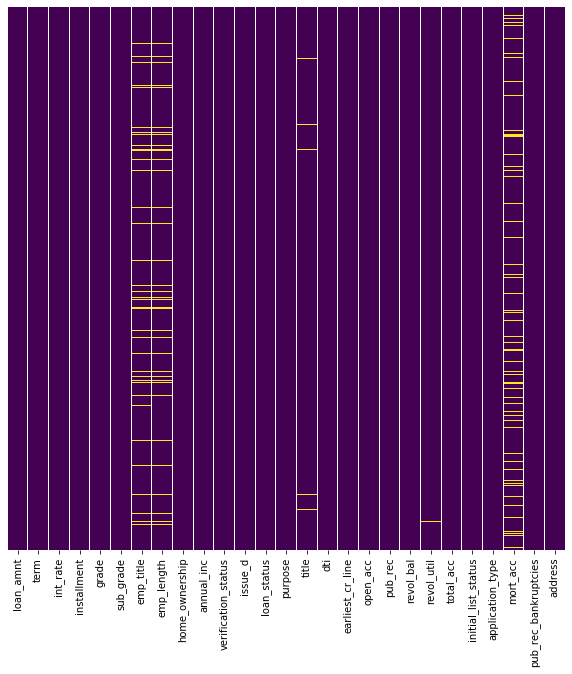

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

** We will focus more on missing data in a different project since it is vital and important topic, we will just focus on building an ANN**

# FEATURE ENGINEERING

** Focusing on all Categorical Data**

In [9]:
df.select_dtypes(object).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [10]:
df['term'].nunique()

2

In [11]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [12]:
df['term'] = df['term'].str.extract('(\d+)')

In [13]:
df['term'] = pd.to_numeric(df['term'])

In [14]:
df['term'].dtype

dtype('int64')

** I have extracted the useful numerical data out of the string**

In [15]:
df.select_dtypes(object).columns

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [16]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [17]:
df.drop('grade', axis=1, inplace=True)

** Since df['grade'] information is available in df['sub_grade'], I dropped the df['grade'] column**

In [18]:
df.select_dtypes(object).columns

Index(['sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [19]:
df['sub_grade'].nunique()

35

In [20]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [21]:
sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)

In [22]:
df = pd.concat([df,sub_grade], axis=1)

In [23]:
df.drop('sub_grade', axis=1, inplace=True)

** Dummy variables are created for df['sub_grade']**

In [24]:
df.select_dtypes(object).columns

Index(['emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [25]:
df['emp_title'].nunique()

173105

In [26]:
df.drop('emp_title', axis=1, inplace=True)

** We have 170K unique employee title. It is not advisable to create that huge dummy variables so we dropped the feature** 

In [27]:
df.select_dtypes(object).columns

Index(['emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [28]:
df['emp_length'].nunique()

11

In [29]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [30]:
len_yr = {"10+ years":11, "2 years":2, "< 1 year":.5, "3 years":3, "5 years":5, "1 year":1, "4 years":4, "6 years":6, "7 years":7, "8 years":8, "9 years":9}
df['emp_length'] = df['emp_length'].map(len_yr)

** We have created a numeric column out of 'emp_length' column**

In [31]:
df.select_dtypes(object).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [32]:
df['home_ownership'].nunique()

6

In [33]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [34]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [35]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [36]:
ownership = pd.get_dummies(df['home_ownership'], drop_first=True)

In [37]:
df = pd.concat([df, ownership], axis=1)

In [38]:
df.drop('home_ownership', axis=1, inplace=True)

** We have created dummy variable for home_ownership column**

In [39]:
df.select_dtypes(object).columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [40]:
df['verification_status'].nunique()

3

In [41]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [42]:
verification_status = pd.get_dummies(df['verification_status'], drop_first=True)

In [43]:
df = pd.concat([df, verification_status], axis=1)
df.drop('verification_status', axis=1, inplace=True)

** We have created dummy variable for verification status column**

In [44]:
df.select_dtypes(object).columns

Index(['issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [45]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'].dtype

dtype('<M8[ns]')

In [46]:
df['issue_yr'] = df['issue_d'].dt.year

In [47]:
df['issue_yr']

0         2015
1         2015
2         2015
3         2014
4         2013
          ... 
396025    2015
396026    2015
396027    2013
396028    2012
396029    2010
Name: issue_yr, Length: 396030, dtype: int64

In [48]:
df.drop('issue_d', axis=1, inplace=True)

** We have extracted year from the issue date column **

In [49]:
df.select_dtypes(object).columns

Index(['loan_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
df['loan_status'].nunique()

2

In [51]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [52]:
status = {"Fully Paid":1, "Charged Off":0}
df['loan_status'] = df['loan_status'].map(status)

In [53]:
df['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

** We have changed labels of 'loan status' for ML model to read**

In [54]:
df.select_dtypes(object).columns

Index(['purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [55]:
df['purpose'].nunique()

14

In [56]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [57]:
purpose = pd.get_dummies(df['purpose'], drop_first=True)

In [58]:
df = pd.concat([df, purpose], axis=1)
df.drop('purpose', axis=1, inplace=True)

** We have created dummy variable for purpose column**

In [59]:
df.select_dtypes(object).columns

Index(['title', 'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [60]:
df['title'].nunique()

48817

In [61]:
df['title'].value_counts()

Debt consolidation                152472
Credit card refinancing            51487
Home improvement                   15264
Other                              12930
Debt Consolidation                 11608
                                   ...  
Credit Refinance/Consolidation         1
Barclay Credit Card Loan               1
Help me breathe again!                 1
CC Elimination Loan                    1
Going to the chapel                    1
Name: title, Length: 48817, dtype: int64

In [62]:
df.drop('title', axis=1, inplace=True)

** This seems to be a personal note column which is similar to purpose column, so this column will be dropped**

In [63]:
df.select_dtypes(object).columns

Index(['earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [64]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [65]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [66]:
df['earliest_cr_line'] = df['earliest_cr_line'].dt.year

** earliest credit line column is clustered by four groups**

In [67]:
df.select_dtypes(object).columns

Index(['initial_list_status', 'application_type', 'address'], dtype='object')

In [68]:
df['initial_list_status']

0         w
1         f
2         f
3         f
4         f
         ..
396025    w
396026    f
396027    f
396028    f
396029    f
Name: initial_list_status, Length: 396030, dtype: object

In [69]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [70]:
initial_list_status = pd.get_dummies(df['initial_list_status'], drop_first=True)

In [71]:
df = pd.concat([df, initial_list_status], axis=1)
df.drop('initial_list_status', axis=1, inplace=True)

** We have created dummy variable for initial list status column**

In [72]:
df.select_dtypes(object).columns

Index(['application_type', 'address'], dtype='object')

In [73]:
df['application_type']

0         INDIVIDUAL
1         INDIVIDUAL
2         INDIVIDUAL
3         INDIVIDUAL
4         INDIVIDUAL
             ...    
396025    INDIVIDUAL
396026    INDIVIDUAL
396027    INDIVIDUAL
396028    INDIVIDUAL
396029    INDIVIDUAL
Name: application_type, Length: 396030, dtype: object

In [74]:
df['application_type'].nunique()

3

In [75]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [76]:
application_type = pd.get_dummies(df['application_type'], drop_first=True)

In [77]:
df = pd.concat([df, application_type], axis=1)
df.drop('application_type', axis=1, inplace=True)

** We have created dummy variable of application type column**

In [78]:
df.select_dtypes(object).columns

Index(['address'], dtype='object')

In [79]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [80]:
df['address'].nunique()

393700

In [81]:
df['address'] = df['address'].apply(lambda zipcode:zipcode[-5:])

In [82]:
df['address'].nunique()

10

In [83]:
address = pd.get_dummies(df['address'], drop_first=True)

In [84]:
df = pd.concat([df, address], axis=1)
df.drop('address', axis=1, inplace=True)

In [85]:
df.shape

(396030, 81)

In [86]:
df.isna().sum()

loan_amnt          0
term               0
int_rate           0
installment        0
emp_length     18301
               ...  
30723              0
48052              0
70466              0
86630              0
93700              0
Length: 81, dtype: int64

In [87]:
df.dropna(axis=0, inplace=True)

In [88]:
df.shape

(340775, 81)

# MODEL BUILDING

In [89]:
y=df['loan_status']

In [90]:
X = df
X.drop('loan_status', axis=1, inplace=True)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scale = StandardScaler()

In [95]:
X_train = scale.fit_transform(X_train)

In [96]:
X_test = scale.transform(X_test)

In [97]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [98]:
model = Sequential()

In [99]:
model.add(Dense(input_dim=80, units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
model.fit(X_train, y_train, batch_size=600, epochs=35, validation_data=(X_test, y_test))

Train on 272620 samples, validate on 68155 samples
Epoch 1/35
272620/272620 [==============================] - 12s 44us/step - loss: 0.3518 - accuracy: 0.8630 - val_loss: 0.2687 - val_accuracy: 0.8882
Epoch 2/35
272620/272620 [==============================] - 9s 32us/step - loss: 0.2750 - accuracy: 0.8862 - val_loss: 0.2605 - val_accuracy: 0.8885
Epoch 3/35
272620/272620 [==============================] - 10s 38us/step - loss: 0.2652 - accuracy: 0.8871 - val_loss: 0.2585 - val_accuracy: 0.8885 ETA: 0s - loss:
Epoch 4/35
272620/272620 [==============================] - 11s 39us/step - loss: 0.2613 - accuracy: 0.8879 - val_loss: 0.2567 - val_accuracy: 0.8892
Epoch 5/35
272620/272620 [==============================] - 11s 39us/step - loss: 0.2597 - accuracy: 0.8880 - val_loss: 0.2571 - val_accuracy: 0.8885
Epoch 6/35
272620/272620 [==============================] - 9s 34us/step - loss: 0.2586 - accuracy: 0.8879 - val_loss: 0.2558 - val_accuracy: 0.8889
Epoch 7/35
272620/272620 [=========

In [101]:
y_pred = model.predict_classes(X_test)

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [103]:
confusion_matrix(y_test, y_pred)

array([[ 6064,  7390],
       [  163, 54538]], dtype=int64)

** False positive too high, however the False negative is very low, In this Business case, we build a good model, however better feature engineering, we can build better model**

In [104]:
accuracy_score(y_test, y_pred)

0.8891790771036607

In [105]:
precision_score(y_test, y_pred)

0.8806678723679111

In [106]:
recall_score(y_test, y_pred)

0.9970201641651889

In [107]:
f1_score(y_test, y_pred)

0.9352390914781058

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.45      0.62     13454
           1       0.88      1.00      0.94     54701

    accuracy                           0.89     68155
   macro avg       0.93      0.72      0.78     68155
weighted avg       0.90      0.89      0.87     68155



**Next comes CNN**